In [163]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

In [164]:
file_path = "Employment_Datasets"

In [165]:
# testing out the file listing directory from the os library
file_list = os.listdir(file_path)
file_list

['Employment_AZ.xlsx',
 'Employment_VT.xlsx',
 'Employment_CO.xlsx',
 'Employment_SC.xlsx',
 'Employment_RI.xlsx',
 'Employment_CA.xlsx',
 'Employment_MD.xlsx',
 'Employment_NC.xlsx',
 'Employment_IA.xlsx',
 'Employment_MN.xlsx',
 'Employment_KS.xlsx',
 'Employment_WI.xlsx',
 'Employment_WA.xlsx',
 'Employment_IN.xlsx',
 'Employment_TC.xlsx',
 'Employment_OH.xlsx',
 'Employment_FL.xlsx',
 'Employment_MA.xlsx',
 'Employment_AL.xlsx',
 'Employment_MO.xlsx',
 'Employment_ND.xlsx',
 'Employment_OA.xlsx',
 'Employment_OK.xlsx',
 'Employment_GA.xlsx',
 'Employment_NE.xlsx',
 '.~lock.Employment_AK.xlsx#',
 'Employment_NJ.xlsx',
 'Employment_ME.xlsx',
 'Employment_NM.xlsx',
 'Employment_KY.xlsx',
 'Employment_NH.xlsx',
 'Employment_WV.xlsx',
 'Employment_CT.xlsx',
 'Employment_IL.xlsx',
 'Employment_DC.xlsx',
 'Employment_NV.xlsx',
 'Employment_MI.xlsx',
 'Employment_ID.xlsx',
 'Employment_HI.xlsx',
 'Employment_LA.xlsx',
 'Employment_MS.xlsx',
 'Employment_SD.xlsx',
 'Employment_DE.xlsx',
 'E

In [166]:
"""
Locating the xls files in the folder and displaying the list of the files

Parsing the specific state code by string slicing the name of the files
"""
xls_files = glob.glob('Employment_Datasets/*.{}'.format('xlsx'))
display(xls_files)

print(xls_files[0][-7:-5])

['Employment_Datasets/Employment_AZ.xlsx',
 'Employment_Datasets/Employment_VT.xlsx',
 'Employment_Datasets/Employment_CO.xlsx',
 'Employment_Datasets/Employment_SC.xlsx',
 'Employment_Datasets/Employment_RI.xlsx',
 'Employment_Datasets/Employment_CA.xlsx',
 'Employment_Datasets/Employment_MD.xlsx',
 'Employment_Datasets/Employment_NC.xlsx',
 'Employment_Datasets/Employment_IA.xlsx',
 'Employment_Datasets/Employment_MN.xlsx',
 'Employment_Datasets/Employment_KS.xlsx',
 'Employment_Datasets/Employment_WI.xlsx',
 'Employment_Datasets/Employment_WA.xlsx',
 'Employment_Datasets/Employment_IN.xlsx',
 'Employment_Datasets/Employment_TC.xlsx',
 'Employment_Datasets/Employment_OH.xlsx',
 'Employment_Datasets/Employment_FL.xlsx',
 'Employment_Datasets/Employment_MA.xlsx',
 'Employment_Datasets/Employment_AL.xlsx',
 'Employment_Datasets/Employment_MO.xlsx',
 'Employment_Datasets/Employment_ND.xlsx',
 'Employment_Datasets/Employment_OA.xlsx',
 'Employment_Datasets/Employment_OK.xlsx',
 'Employmen

AZ


<h2> Reading The files, and adding the state code as a column to the the Data Frame</h2>

In [167]:
#This is what the data frame looks like when we first read it with pandas
pd.read_excel(file, skiprows=10) # we had to skip 10 dirty rows in the excel file

/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,2005,Jan,66.6,63.7,481501,460719,20782,4.3
1,2005,Feb,66.6,63.7,481942,461273,20669,4.3
2,2005,Mar,66.5,63.7,482380,461878,20502,4.3
3,2005,Apr,66.6,63.8,482966,462673,20293,4.2
4,2005,May,66.6,63.8,483804,463742,20062,4.1
...,...,...,...,...,...,...,...,...
210,2022,Jul,62.6,61.0,565913,550795,15118,2.7
211,2022,Aug,62.7,60.9,567249,551381,15868,2.8
212,2022,Sep,62.6,60.8,568014,551609,16405,2.9
213,2022,Oct,62.5,60.6,568135,551238,16897,3.0


Notice that the dataframe had no state codes at the start, so we have to add that in as a column

In [168]:
#this is how we can parse the state code from the file names, for example, the first file
xls_files[0][-7:-5]
#we'll do this for every file

'AZ'

In [169]:
"""
We made a function read the file seperately, and add the state column based on the file name as shown above
"""
def read_and_add_state(file):
    df = pd.read_excel(file, skiprows=10)
    state_codes = [file[-7:-5]] * 215 #repeat the state code 215 times since we have 215 rows, so we need 
    df["State"] = state_codes
    return df


#list to store the 50 dataframes
state_emp_list = []

#apply the function to every file 
for i, file in enumerate(xls_files):
    df = read_and_add_state(file)
    state_emp_list.append(df)

df_concat = pd.concat(state_emp_list)

/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/styleshee

/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/giva16/anaconda3/lib/python3.9/site-packages/openpyxl/styles/styleshee

In [170]:
df_concat.

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State
0,2005,Jan,64.1,61.2,2813887,2684510,129377,4.6,AZ
1,2005,Feb,64.1,61.1,2821319,2690651,130668,4.6,AZ
2,2005,Mar,64.1,61.1,2830147,2698108,132039,4.7,AZ
3,2005,Apr,64.1,61.1,2840229,2707135,133094,4.7,AZ
4,2005,May,64.2,61.2,2850925,2717283,133642,4.7,AZ
...,...,...,...,...,...,...,...,...,...
210,2022,Jul,62.6,61.0,565913,550795,15118,2.7,MT
211,2022,Aug,62.7,60.9,567249,551381,15868,2.8,MT
212,2022,Sep,62.6,60.8,568014,551609,16405,2.9,MT
213,2022,Oct,62.5,60.6,568135,551238,16897,3.0,MT


In [171]:
df2 = df_concat.groupby(['Year','State'])["unemployment rate"].mean()

In [179]:
#Exporting to csv
#df_concat.to_csv('Final-Unemployment-rate')

In [172]:
df2.unstack()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TC,TN,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2005,6.933333,4.458333,5.258333,4.666667,5.383333,5.075000,4.800000,6.991667,4.508333,2.875000,...,3.550000,5.458333,5.525000,4.041667,3.825000,3.450000,5.591667,4.741667,5.425000,3.541667
2006,6.633333,4.000000,5.250000,4.308333,4.916667,4.275000,4.425000,6.325000,3.908333,2.466667,...,3.000000,5.000000,5.275000,2.866667,3.341667,3.716667,5.000000,4.675000,5.200000,3.008333
2007,6.258333,4.041667,5.391667,3.750000,5.308333,3.700000,4.450000,5.950000,3.608333,3.300000,...,2.825000,4.366667,4.633333,2.558333,3.283333,3.941667,4.600000,4.825000,4.825000,2.691667
2008,6.475000,5.883333,5.441667,5.791667,7.300000,4.875000,5.650000,6.850000,5.033333,5.691667,...,3.083333,4.866667,6.516667,3.341667,4.275000,4.566667,5.291667,4.983333,4.750000,2.933333
2009,7.983333,10.083333,7.725000,9.666667,11.541667,7.875000,8.325000,10.000000,8.341667,9.558333,...,4.583333,7.541667,10.116667,7.258333,6.833333,6.166667,8.266667,8.958333,8.300000,6.258333
2010,8.133333,10.375000,7.858333,10.300000,12.458333,9.141667,9.558333,9.950000,8.658333,10.825000,...,4.908333,8.191667,9.825000,7.933333,7.291667,6.316667,9.133333,8.500000,8.633333,6.941667
2011,7.733333,9.583333,7.908333,9.433333,11.891667,8.691667,9.016667,10.191667,7.608333,10.000000,...,4.600000,8.016667,9.108333,7.058333,6.541667,5.566667,8.525000,7.533333,7.825000,6.133333
2012,7.250000,8.158333,7.266667,8.350000,10.525000,8.000000,8.358333,8.975000,7.066667,8.666667,...,4.058333,6.708333,7.958333,4.775000,5.950000,4.816667,7.641667,6.925000,7.258333,5.500000
2013,6.991667,7.325000,7.041667,7.816667,9.033333,6.750000,7.950000,8.433333,6.608333,7.533333,...,3.700000,6.300000,7.725000,4.208333,5.550000,4.416667,6.633333,6.641667,6.716667,4.733333


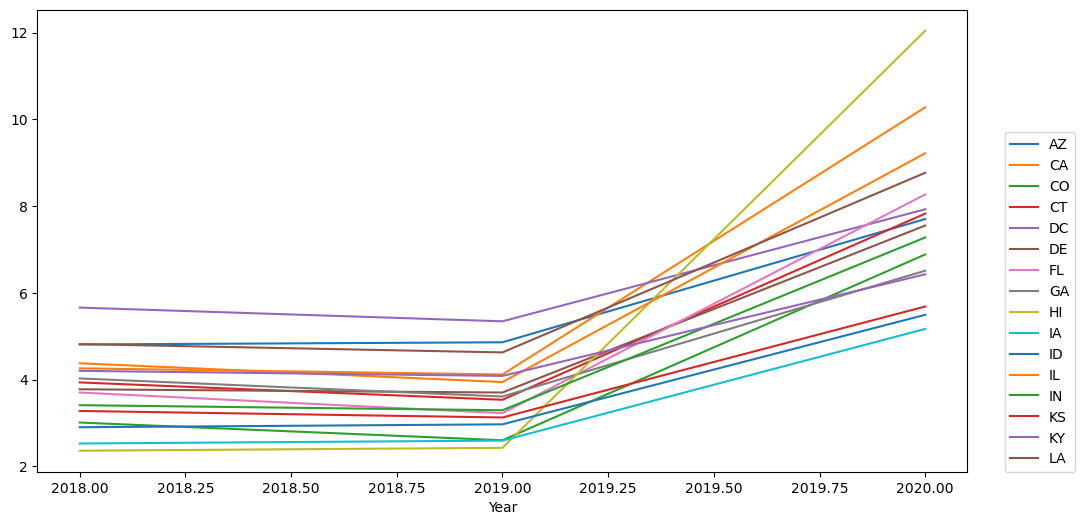

In [178]:
df2.loc['2018':'2020','AZ':'LA'].unstack().plot(figsize=(12, 6))
plt.legend(loc=(1.04, 0))